Name: Avisha Singh
ID: 2088371
Homework 4

# Section B

In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_excel("ExampleOilMeasurementDaily.xlsx")
df.head()

,Oil,2018-10-01 00:00:00,1329.6
0,Oil,2018-10-02,1435.2
1,Oil,2018-10-03,1372.1
2,Oil,2018-10-04,1371.7
3,Oil,2018-10-05,1200.0
4,Oil,2018-10-06,978.7


In [6]:
# As we can see the column header row too has data. So first, making that row as the first row in our dataset and 
#then giving column names
df.iloc[0] = df.columns
df.columns = ['Type','Date','Amount']
df = df.drop(labels=0,axis=0)

#Dropping the Type column since we will not use that for forecasting

df1 = df.drop(columns=['Type'])

In [7]:
df1.set_index('Date',inplace=True) #Making the Date as the index

In [8]:
df1

,Amount
Date,
2018-10-03,1372.1
2018-10-04,1371.7
2018-10-05,1200.0
2018-10-06,978.7
2018-10-07,1003.8
...,...
2022-04-07,110.8
2022-04-08,97.2
2022-04-09,119.9


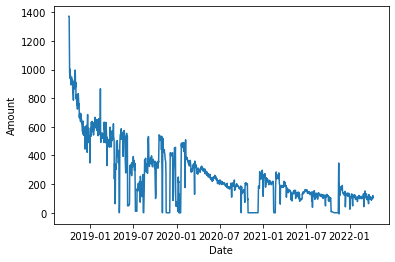

In [9]:
# Plot of Date vs the Amount of Oil Extracted
plt.ylabel('Amount')
plt.xlabel('Date')
plt.plot(df1)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1265 entries, 2018-10-03 to 2022-04-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  1265 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


In [11]:
df1.describe()

,Amount
count,1265.000000
mean,270.418893
std,208.986701
min,-8.100000
25%,125.900000
50%,206.400000
75%,364.800000
max,1372.100000


In [12]:
data = df1.Amount.values

Using ARIMA

In [13]:
from statsmodels.tsa.arima.model import ARIMA #Importing ARIMA
# fit model

model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[109.37715268]


In [14]:
# next day predicted change is
forecast_percent_change = ((yhat/data[-1])-1)*100.0
forecast_percent_change

array([-0.47574824])

Using Simple Exponential Smoothing (SES)

In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #Importing SES
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[110.60519698]


C:\Users\avish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [16]:
# next day predicted change is
forecast_percent_change = ((yhat/data[-1])-1)*100.0
forecast_percent_change

array([0.6416715])